In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ../scripts/

/home/jds98/10 Academy/Week 2/a-b-hypothesis-for-ad-campaign-peformance-measurement/scripts


In [3]:
import eda

In [4]:
cd ../data/

/home/jds98/10 Academy/Week 2/a-b-hypothesis-for-ad-campaign-peformance-measurement/data


In [5]:
df = pd.read_csv('AdSmartABdata.csv')

In [6]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


## Checking some information about the dataset

In [7]:
eda.data_shape(df)

 There are 8077 rows and 9 columns


In [8]:
eda.data_types(df)

object    5
int64     4
dtype: int64

In [9]:
eda.percent_missing(df)

The dataset contains 0.0 % missing values.


# Plotting categorical variables

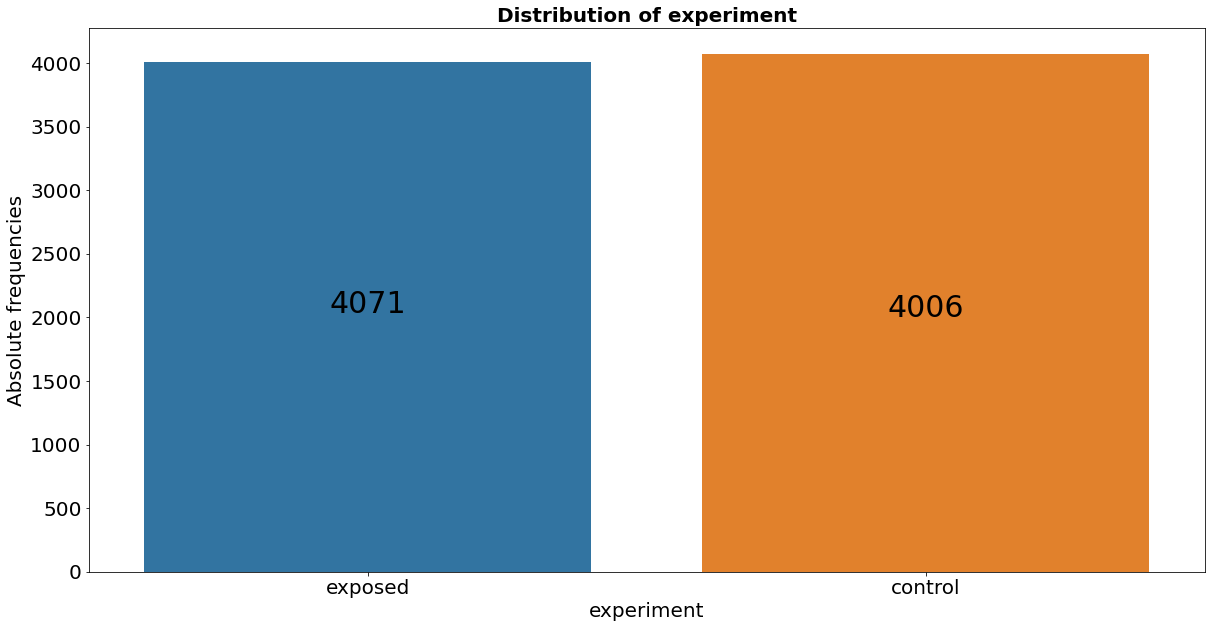

In [10]:
eda.plot_count(df, 'experiment')

Comment

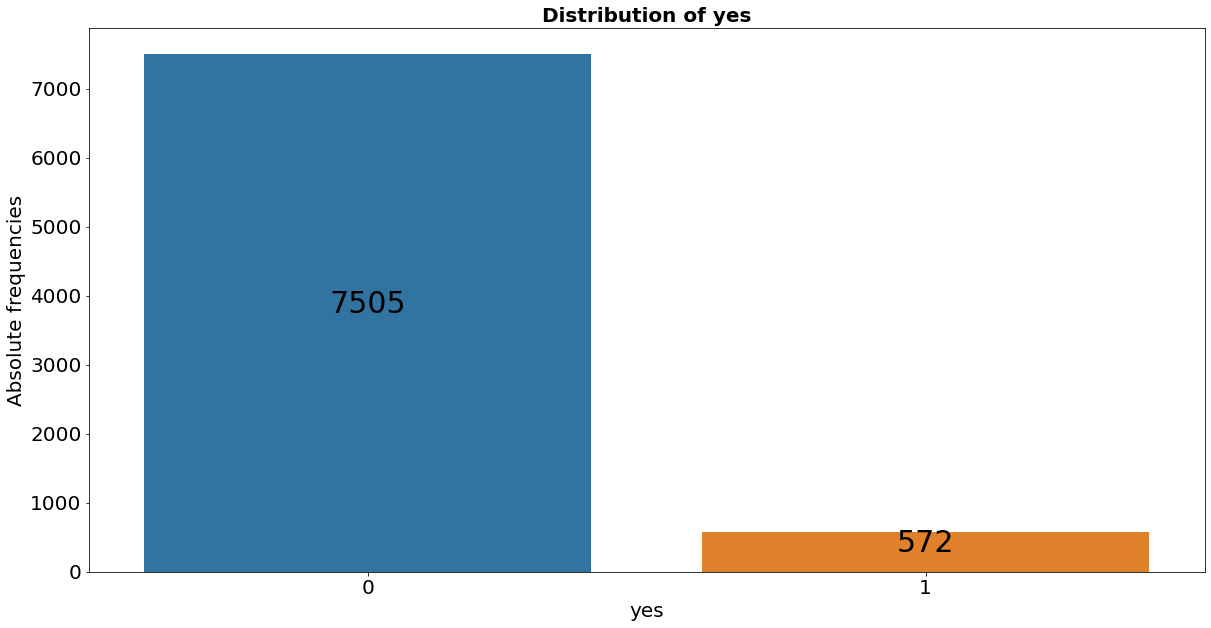

In [11]:
eda.plot_count(df, 'yes')

Comment

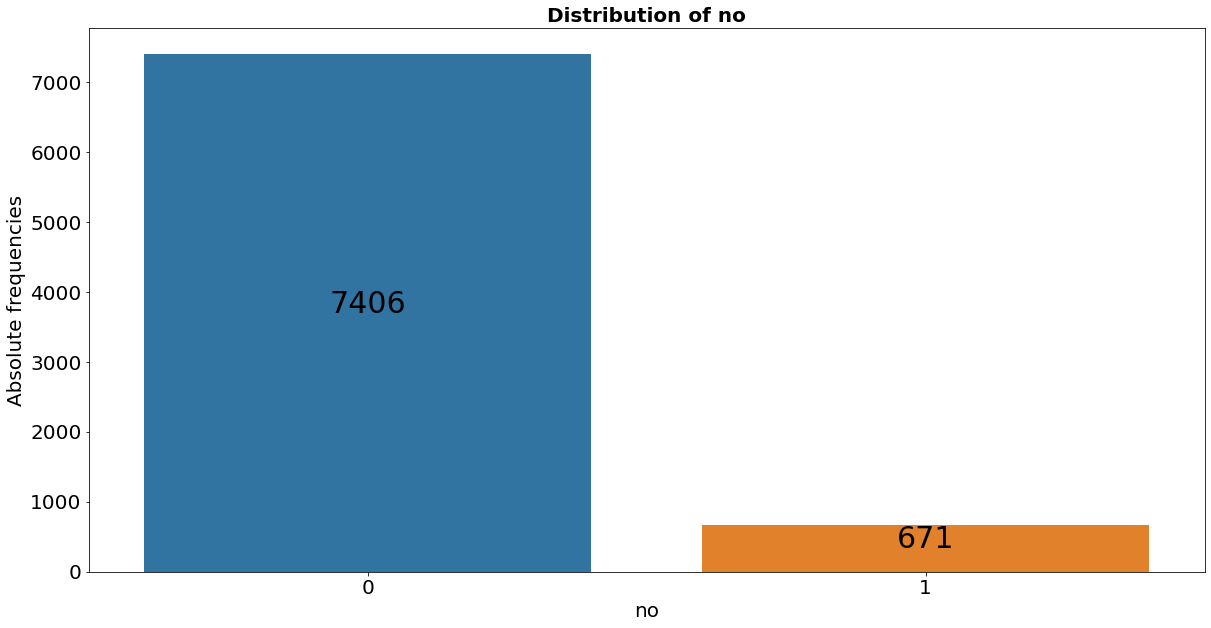

In [12]:
eda.plot_count(df, 'no')

Comment

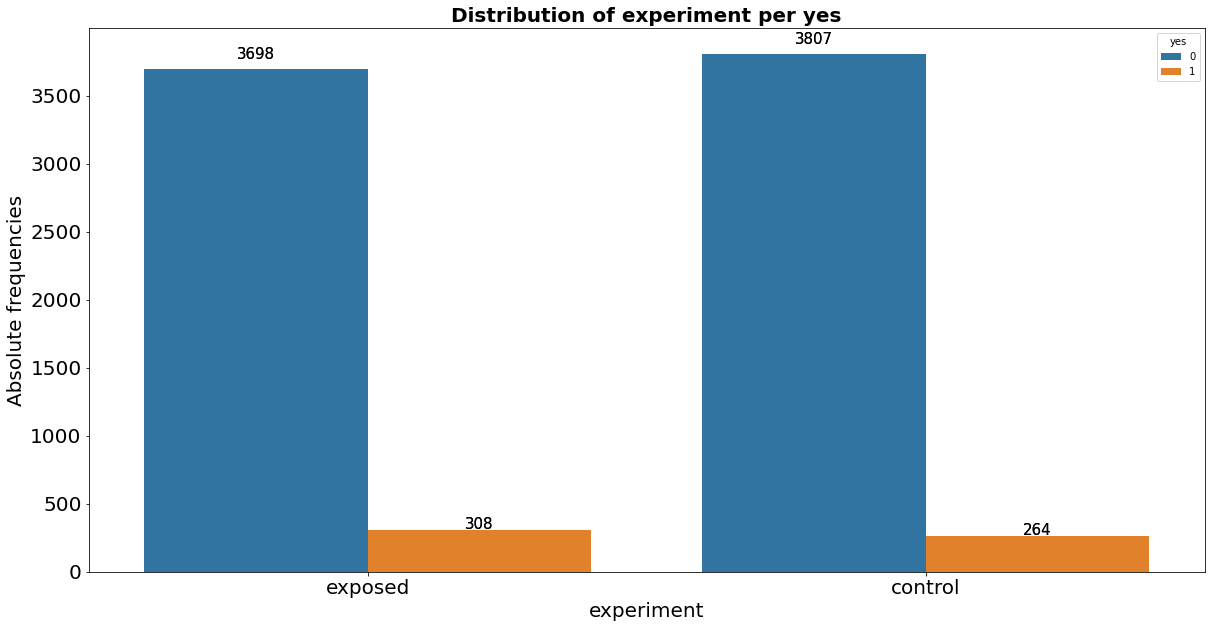

In [13]:
eda.multi_plot_count(df, 'experiment', 'yes')

Comment

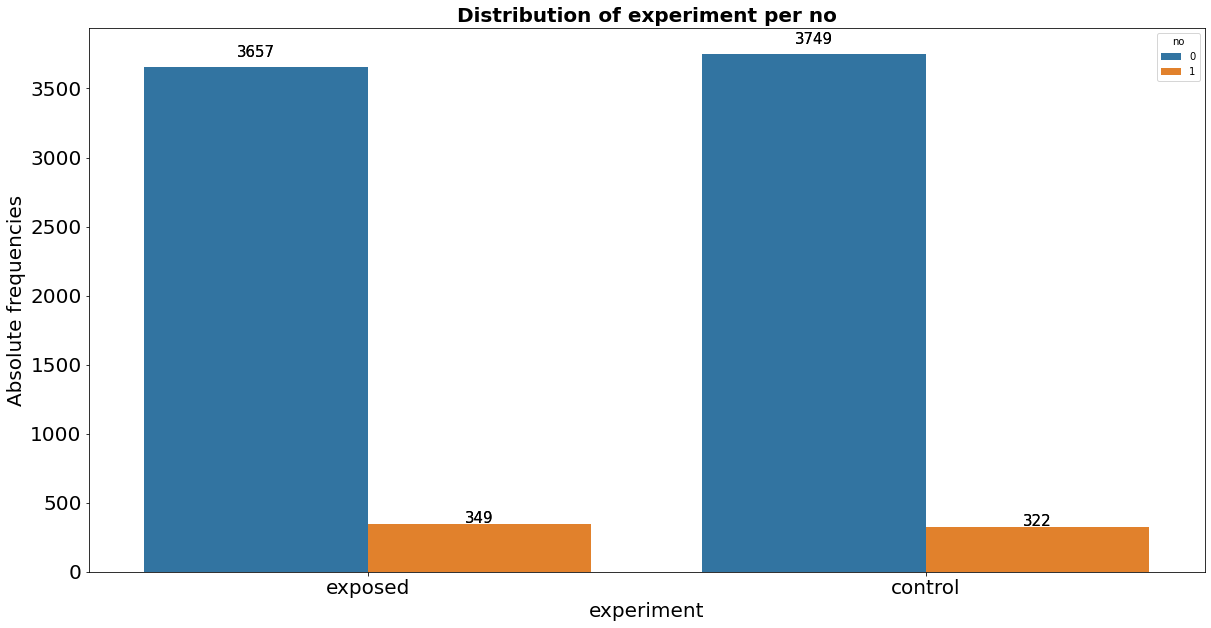

In [14]:
eda.multi_plot_count(df, 'experiment', 'no')

Comment

## Browser, devise_make and platform_os top values distribution